In [1]:
# Data Exploration
import pandas as pd

df_output = pd.read_csv("data/output.csv")
df_clean = pd.read_csv("data/cleaned_data.csv")
df_nationality = pd.read_csv("data/nationality.csv")

In [2]:
df_output.head()

,Language,Index,Word
0,be,0,аборт
1,be,1,анальны
2,be,2,анус
3,be,3,задніца
4,be,4,асёл прыдурак


In [3]:
df_clean.head()

,Unnamed: 0,username,post,political_leaning,cleaned_post,amount_of_cursewords
0,0,t2_7ramzeng,"You can ""buy"" the show and stream it through t...",right,buy show stream including lethal weapon url ep...,4
1,1,t2_7ramzeng,"me want to play Q*bert Holy shit, based Alex J...",right,want play qbert holy shit based alex jones bro...,2
2,2,t2_7ramzeng,Shouldn't rely on any external services or per...,right,shouldnt rely external service persistent data...,3
3,3,t2_7ramzeng,PR to a specific person. Usually that just mea...,right,pr specific person usually mean roundrobin app...,5
4,4,t2_7ramzeng,This article's intention is clear that they wa...,right,article intention clear want imply causal rela...,1


In [4]:
df_nationality.head()

,auhtor_ID,post,nationality
0,t2_10uons,"It isn't, it's just for show. It isn't legally...",Finland
1,t2_10uons,games won to games played. Games played is cal...,Finland
2,t2_10uons,So with that logic USA is a very shitty place ...,Finland
3,t2_10uons,"are referring to It does add up a lot when EA,...",Finland
4,t2_10uons,get another role than support Lel people here ...,Finland


In [5]:
df_nationality["nationality"].nunique()

56

In [6]:
df_nationality['id'] = df_nationality.groupby(['nationality']).ngroup()
df_nationality

,auhtor_ID,post,nationality,id
0,t2_10uons,"It isn't, it's just for show. It isn't legally...",Finland,17
1,t2_10uons,games won to games played. Games played is cal...,Finland,17
2,t2_10uons,So with that logic USA is a very shitty place ...,Finland,17
3,t2_10uons,"are referring to It does add up a lot when EA,...",Finland,17
4,t2_10uons,get another role than support Lel people here ...,Finland,17
...,...,...,...,...
82611,t2_57ogt82f,and Sergeant York. WWI didn't lend it'self to ...,United Kingdom,55
82612,t2_57ogt82f,a position where a person can get short term f...,United Kingdom,55
82613,t2_57ogt82f,you have to read the label. Some are just as h...,United Kingdom,55
82614,t2_57ogt82f,as traitors. Some suggesting it was treason. T...,United Kingdom,55


In [7]:
import json
import csv
import numpy as np
from tqdm import tqdm
import string
import re
import nltk
from nltk.corpus import stopwords


In [8]:
#only run following if you have not yet downloaded the stopwords
# nltk.download('stopwords') 
# nltk.download('punkt')
# nltk.download('wordnet')

In [9]:
def preprocess(text):
    text = text.lower()

    text  = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]',"", text)

    tokens = nltk.word_tokenize(text)

    return tokens

In [10]:
def remove_stopwords (tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

In [11]:
def lemmatization(tokens):
    lemmatizer = nltk.WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized

In [12]:
def clean_text(text):
    tokens = preprocess(text)
    filtered_tokens = remove_stopwords(tokens)
    lemmatizer = lemmatization(filtered_tokens)
    clean = " ".join(lemmatizer)
    return clean

In [13]:
df_nationality['new'] = df_nationality['post'].apply(clean_text)

In [14]:
csv_data = pd.read_csv('data/output.csv')
word_set = set(csv_data['Word'].values)
tqdm.pandas()

In [15]:
df_nationality['cursewords'] = df_nationality['new'].apply(lambda x: sum([1 for word in x.split() if word in word_set]))

In [16]:
df_nationality = df_nationality.rename(columns={'auhtor_ID': 'username'})
df_nationality.drop('post', axis=1)
df_nationality = df_nationality.rename(columns={'new': 'post'})

In [17]:
df_nationality.to_csv("cleaned_data_nat.csv")

In [18]:
s = pd.value_counts(df_nationality.nationality)
print(s)

nationality
Germany                   12838
United Kingdom             7861
USA                        7646
The Netherlands            6905
Sweden                     3364
Finland                    3262
Poland                     3031
France                     2869
Italy                      2644
Spain                      2441
Ireland                    2328
Belgium                    2284
Romania                    2018
Denmark                    1960
Norway                     1801
Czech Republic             1490
Portugal                   1379
Greece                     1247
Austria                    1213
Canada                     1203
Slovenia                   1191
Hungary                    1188
Turkey                     1160
Russia                     1134
Croatia                    1063
Switzerland                1028
Ukraine                     843
Bulgaria                    669
Estonia                     647
Lithuania                   588
Serbia                      

C:\Users\20203527\AppData\Local\Temp\ipykernel_13356\2250302367.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  s = pd.value_counts(df_nationality.nationality)


In [19]:
large_countries = s[s>500]
large_countries

nationality
Germany            12838
United Kingdom      7861
USA                 7646
The Netherlands     6905
Sweden              3364
Finland             3262
Poland              3031
France              2869
Italy               2644
Spain               2441
Ireland             2328
Belgium             2284
Romania             2018
Denmark             1960
Norway              1801
Czech Republic      1490
Portugal            1379
Greece              1247
Austria             1213
Canada              1203
Slovenia            1191
Hungary             1188
Turkey              1160
Russia              1134
Croatia             1063
Switzerland         1028
Ukraine              843
Bulgaria             669
Estonia              647
Lithuania            588
Name: count, dtype: int64

In [20]:
len(large_countries)

30

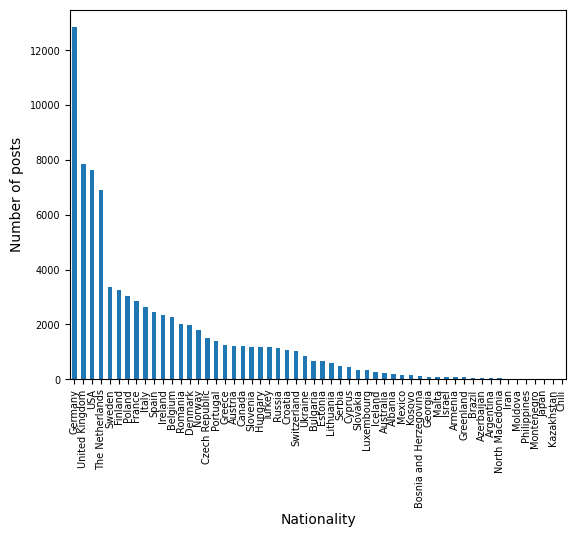

In [21]:
plt = s.plot(kind='bar', fontsize=7, xlabel = "Nationality", ylabel="Number of posts")

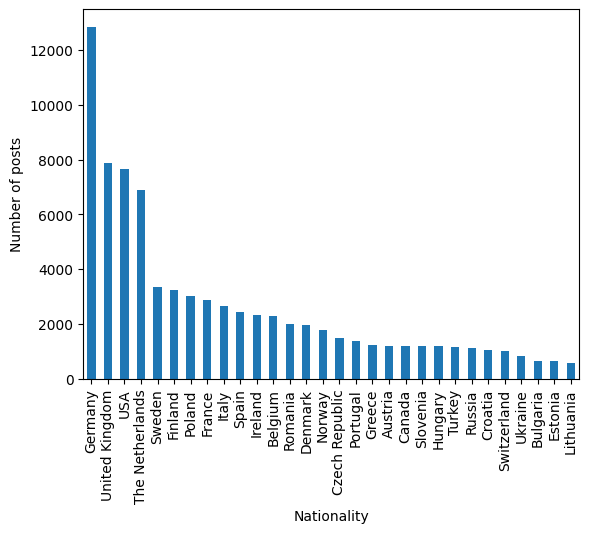

In [22]:
plt1 = large_countries.plot(kind='bar', fontsize=10, xlabel = "Nationality", ylabel="Number of posts")

In [23]:
df_nationality

,username,post,nationality,id,post,cursewords
0,t2_10uons,"It isn't, it's just for show. It isn't legally...",Finland,17,isnt show isnt legally binding depends also ra...,2
1,t2_10uons,games won to games played. Games played is cal...,Finland,17,game game played game played calculated compar...,6
2,t2_10uons,So with that logic USA is a very shitty place ...,Finland,17,logic usa shitty place live shooting per milli...,6
3,t2_10uons,"are referring to It does add up a lot when EA,...",Finland,17,referring add lot ea activision etc rerelease ...,3
4,t2_10uons,get another role than support Lel people here ...,Finland,17,get another role support lel people thinking h...,7
...,...,...,...,...,...,...
82611,t2_57ogt82f,and Sergeant York. WWI didn't lend it'self to ...,United Kingdom,55,sergeant york wwi didnt lend film fought cold ...,0
82612,t2_57ogt82f,a position where a person can get short term f...,United Kingdom,55,position person get short term fame committing...,6
82613,t2_57ogt82f,you have to read the label. Some are just as h...,United Kingdom,55,read label high red meat yet others low qualit...,5
82614,t2_57ogt82f,as traitors. Some suggesting it was treason. T...,United Kingdom,55,traitor suggesting treason treason death penal...,2


In [24]:
df_nationality['cursewords']

0        2
1        6
2        6
3        3
4        7
        ..
82611    0
82612    6
82613    5
82614    2
82615    2
Name: cursewords, Length: 82616, dtype: int64

Do a Anderson-Darling test to see if the amount of swearwords is Normal

In [25]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
data = df_nationality['cursewords']
result = anderson(data)
print('stat={0:.3g}'.format(result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=1.53e+04
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [49]:
# see what posts with over 100 curse words look like
df_nationality[df_nationality['cursewords'] >= 50]

,username,post,nationality,id,post,cursewords
458,t2_169pyv,nach Festigkeit vorher anschmelzen aber nicht ...,Germany,20,nach festigkeit vorher anschmelzen aber nicht ...,98
1420,t2_7vkt3,"Waren alle produziert werden, welche Arbeitsst...",Germany,20,waren alle produziert werden welche arbeitsstu...,50
1505,t2_7vkt3,we have multiplication and addition for all nu...,Germany,20,multiplication addition number division subset...,67
1521,t2_7vkt3,"In planar chaos, there are also 5 color-shifte...",Germany,20,planar chaos also colorshifted dragon legend f...,52
1549,t2_7vkt3,the number. Or with the function f(x) = (x^(2)...,Germany,20,number function fx x x limit fx x go note deno...,53
11610,t2_6z56v3b4,Tvoja keva Is this fucking Jermy form the ratt...,Croatia,12,tvoja keva fucking jermy form rattatoulie role...,911
15058,t2_5r3bcw7l,These contact tracing apps are almost useless ...,Germany,20,contact tracing apps almost useless anyways ge...,490
15059,t2_5r3bcw7l,cock horse cock horse cock horse cock horse co...,Germany,20,cock horse cock horse cock horse cock horse co...,195
15966,t2_7v3qo4ja,a long time ago that abbott dude clearly was d...,United Kingdom,55,long time ago abbott dude clearly dropped head...,59
31322,t2_12hvgq,that looks somewhat scary and gives me a jump ...,Poland,41,look somewhat scary give jump scare sometimes ...,53


In [29]:
df_nationality.value_counts('cursewords')

cursewords
3      8325
2      8316
4      7926
5      7277
1      7032
       ... 
52        1
51        1
50        1
47        1
147       1
Name: count, Length: 79, dtype: int64

In [42]:
df_nationality_cleaned = df_nationality[df_nationality['cursewords'] <= 50]

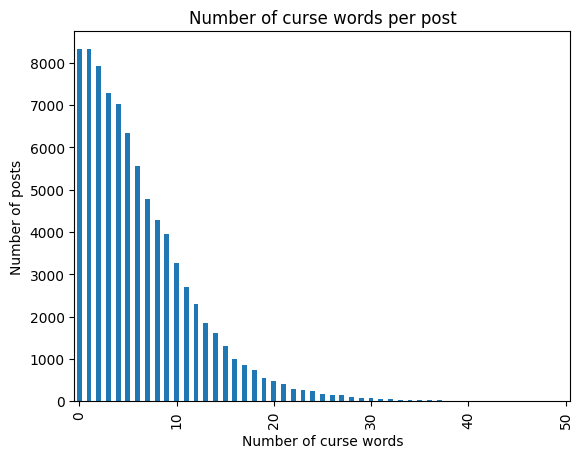

In [46]:
df_nationality_cleaned.value_counts('cursewords').plot(kind='bar', fontsize=10, xlabel = "Number of curse words", ylabel="Number of posts", title="Number of curse words per post", xticks=np.arange(0, 51, 10));

In [47]:
correlation = df_nationality_cleaned['id'].corr(df_nationality_cleaned['cursewords'])
df_new = df_nationality_cleaned[['id', 'cursewords']].copy()
correlation_matrix = df_new.corr()
print(correlation_matrix)

                  id  cursewords
id          1.000000    0.065842
cursewords  0.065842    1.000000


In [48]:
correlation = df_nationality['id'].corr(df_nationality['cursewords'])
df_new = df_nationality[['id', 'cursewords']].copy()
correlation_matrix = df_new.corr()
print(correlation_matrix)

                  id  cursewords
id          1.000000    0.023984
cursewords  0.023984    1.000000


Next step: <br>
Remove small countries by excluding countries not in large_countries